# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
       # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp_kelvin = city_weather['main']['temp_max']
        city_humidity =  city_weather['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =  city_weather['sys']['country']
        city_date =  city_weather['dt']

        city_max_temp = city_max_temp_kelvin - 273.15
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | daru
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | kitimat
Processing Record 5 of Set 1 | namibe
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | bulanash
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | boa vista
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | aykhal
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | trairi
Processing Record 18 of Set 1 | tabou
Processing Record 19 of Set 1 | saudarkrokur
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | fort mcmurray
Processing Record 23 of Set 1 | mount pearl
Pr

Processing Record 41 of Set 4 | nuuk
Processing Record 42 of Set 4 | constantia
Processing Record 43 of Set 4 | pudozh
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | kristiansund
Processing Record 46 of Set 4 | cururupu
Processing Record 47 of Set 4 | bikenibeu village
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | sandnessjoen
Processing Record 0 of Set 5 | aoulef
Processing Record 1 of Set 5 | minas de matahambre
City not found. Skipping...
Processing Record 2 of Set 5 | chonchi
Processing Record 3 of Set 5 | collie
Processing Record 4 of Set 5 | port shepstone
Processing Record 5 of Set 5 | hawaiian paradise park
Processing Record 6 of Set 5 | san fernando
Processing Record 7 of Set 5 | kapuskasing
Processing Record 8 of Set 5 | yarmouth
Processing Record 9 of Set 5 | le port
Processing Record 10 of Set 5 | kolonia
Processing Record 11 of Set 5 | itoman
Processing Record 12 of Set 5 | naze
Processing Record 13 of Set 5 | a

Processing Record 28 of Set 8 | galesong
Processing Record 29 of Set 8 | lagunas
Processing Record 30 of Set 8 | gubkinskiy
Processing Record 31 of Set 8 | poronaysk
Processing Record 32 of Set 8 | rampur
Processing Record 33 of Set 8 | lajinha
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | ingeniero jacobacci
Processing Record 36 of Set 8 | nogliki
Processing Record 37 of Set 8 | brandon
Processing Record 38 of Set 8 | vadso
Processing Record 39 of Set 8 | ocumare del tuy
Processing Record 40 of Set 8 | caxias
Processing Record 41 of Set 8 | vorkuta
Processing Record 42 of Set 8 | karasburg
Processing Record 43 of Set 8 | utrik
Processing Record 44 of Set 8 | hemsby
Processing Record 45 of Set 8 | peniche
Processing Record 46 of Set 8 | prineville
Processing Record 47 of Set 8 | galliano
Processing Record 48 of Set 8 | betong
Processing Record 49 of Set 8 | boende
Processing Record 0 of Set 9 | hayma'
City not found. Skipping...
Processing Record 1 

Processing Record 17 of Set 12 | axim
Processing Record 18 of Set 12 | palmer
Processing Record 19 of Set 12 | warmbad
Processing Record 20 of Set 12 | contwig
Processing Record 21 of Set 12 | alotau
City not found. Skipping...
Processing Record 22 of Set 12 | fukuecho
Processing Record 23 of Set 12 | viqueque
Processing Record 24 of Set 12 | inongo
Processing Record 25 of Set 12 | gorodishche
Processing Record 26 of Set 12 | jiuquan
Processing Record 27 of Set 12 | el idrissia
Processing Record 28 of Set 12 | turkmenbasy
Processing Record 29 of Set 12 | revda
Processing Record 30 of Set 12 | taulaga
Processing Record 31 of Set 12 | shingu
Processing Record 32 of Set 12 | saint-philippe
Processing Record 33 of Set 12 | usinsk
Processing Record 34 of Set 12 | paso de la patria
Processing Record 35 of Set 12 | coquimbo
Processing Record 36 of Set 12 | bage
Processing Record 37 of Set 12 | igarka
Processing Record 38 of Set 12 | nueve de julio
Processing Record 39 of Set 12 | carutapera
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          597
Lat           597
Lng           597
Max Temp      597
Humidity      597
Cloudiness    597
Wind Speed    597
Country       597
Date          597
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,daru,-9.0763,143.2092,26.68,88,70,5.65,PG,1682357221
1,tura,25.5198,90.2201,23.32,46,6,1.75,IN,1682357223
2,bilibino,68.0546,166.4372,-16.44,80,3,2.59,RU,1682357223
3,kitimat,54.0524,-128.6534,9.21,43,100,0.45,CA,1682357223
4,namibe,-15.1961,12.1522,24.53,71,54,6.51,AO,1682357224


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,daru,-9.0763,143.2092,26.68,88,70,5.65,PG,1682357221
1,tura,25.5198,90.2201,23.32,46,6,1.75,IN,1682357223
2,bilibino,68.0546,166.4372,-16.44,80,3,2.59,RU,1682357223
3,kitimat,54.0524,-128.6534,9.21,43,100,0.45,CA,1682357223
4,namibe,-15.1961,12.1522,24.53,71,54,6.51,AO,1682357224


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

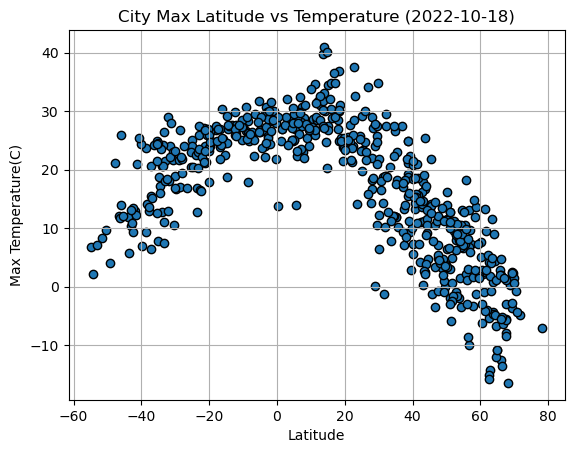

In [8]:
# Build scatter plot for latitude vs. temperature
lat= city_data_df['Lat']
temp= city_data_df['Max Temp']

plt.scatter(lat, temp,edgecolors='black', )
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs Temperature (2022-10-18)')

# Save the figure

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

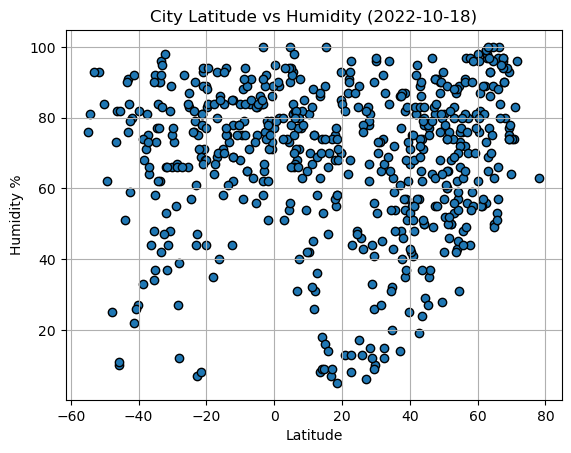

In [9]:
# Build the scatter plots for latitude vs. humidity
lat= city_data_df['Lat']
humidity= city_data_df['Humidity']

plt.scatter(lat, humidity,edgecolors='black', )
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity (2022-10-18)')



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

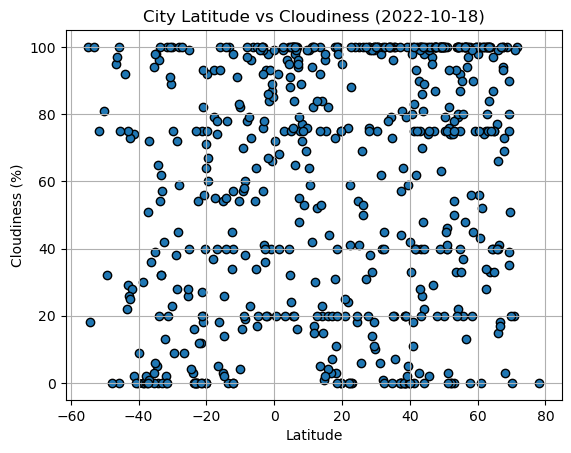

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat= city_data_df['Lat']
clouds= city_data_df['Cloudiness']

plt.scatter(lat, clouds,edgecolors='black', )
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

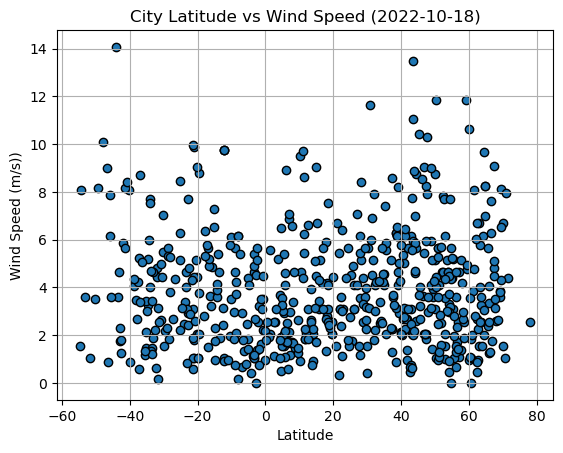

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat= city_data_df['Lat']
wind= city_data_df['Wind Speed']

plt.scatter(lat, wind,edgecolors='black', )
# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s))')
plt.title('City Latitude vs Wind Speed (2022-10-18)')



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_cities = city_data_df['Lat']>=0
northern_hemi_df= city_data_df[north_cities]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tura,25.5198,90.2201,23.32,46,6,1.75,IN,1682357223
2,bilibino,68.0546,166.4372,-16.44,80,3,2.59,RU,1682357223
3,kitimat,54.0524,-128.6534,9.21,43,100,0.45,CA,1682357223
5,saipan,15.1355,145.7010,27.39,100,75,6.69,MP,1682357224
6,bulanash,57.2783,61.9965,7.24,80,97,1.07,RU,1682357225


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

south_cities = city_data_df['Lat']<=0
southern_hemi_df= city_data_df[south_cities]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,daru,-9.0763,143.2092,26.68,88,70,5.65,PG,1682357221
4,namibe,-15.1961,12.1522,24.53,71,54,6.51,AO,1682357224
7,port-aux-francais,-49.3500,70.2167,4.12,62,32,8.15,TF,1682357225
8,ushuaia,-54.8000,-68.3000,6.81,76,100,1.54,AR,1682357226
9,port elizabeth,-33.9180,25.5701,20.61,90,20,7.72,ZA,1682357226


###  Temperature vs. Latitude Linear Regression Plot

In [42]:
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    fig, ax = plt.subplots()
    ax.scatter(x_values, y_values)
    ax.plot(x_values, regress_values, "r-")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\n"
    ax.text(*text_coordinates, line_eq, fontsize=12, color="red")
    
    r_value_text = f"The r-value is: {rvalue}"
  

    print(r_value_text)
    plt.show()

The r-value is: -0.8592343383198329


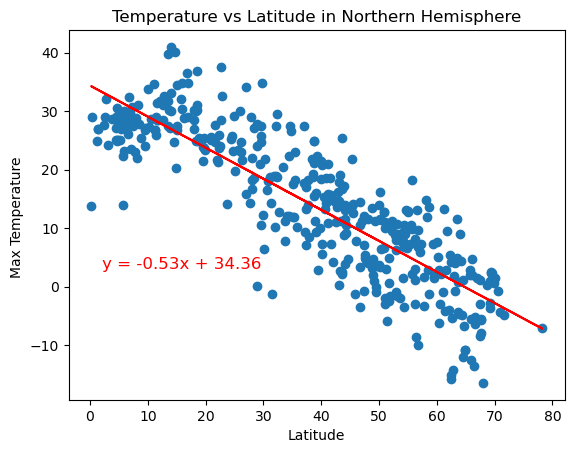

In [84]:
# Linear regression on Northern Hemisphere


x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 
                        'Temperature vs Latitude in Northern Hemisphere',
                        'Latitude', 'Max Temperature ',
                       (2,0))


**Discussion about the linear relationship:**  Within the Northern Hemisphere there is a strong negative correlation between temperature and latitude. The temperature decreases by .53 units for every on unit increase in latitude. The 0 point represents the equator, which substantiates the belief that the closer a point is to the equator the temperature will be higher. 

The r-value is: 0.7645971128921698


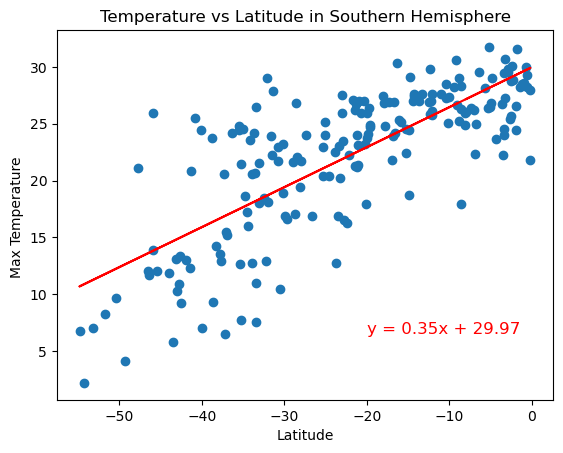

In [70]:
# Linear regression on Southern Hemisphere


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

plot_linear_regression(x_values, y_values, 
                        'Temperature vs Latitude in Southern Hemisphere',
                        'Latitude', 'Max Temperature ',
                       (-20,5))

**Discussion about the linear relationship:** Within the Southern Hemisphere there is strength in the  positive correlation between temperature and latitude, however slightly lower than the Northern Hemisphere. The temperature increases by .35 units for every on unit increase in latitude. The 0 point represents the equator, which substantiates the belief that the closer a point is to the equator the temperature will be higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1623302312120572


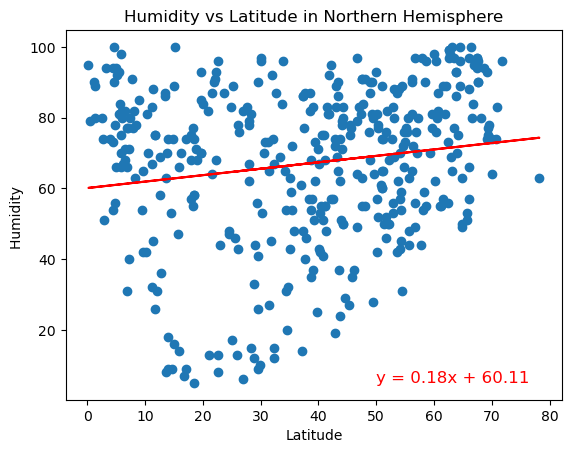

In [73]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

plot_linear_regression(x_values, y_values, 
                        'Humidity vs Latitude in Northern Hemisphere',
                        'Latitude', 'Humidity ',
                       (50,0))

**Discussion about the linear relationship:** There is not much correlation between humidity and latitude in the Northern Hemisphere, although the data points a lower end positive relationship. For every one-unit increase in latitude, the humidity level will increase by .18 units which is a relatively mild increase and can’t not be relied upon as a prediction because of the weak correlation. 

The r-value is: 0.21155610229294022


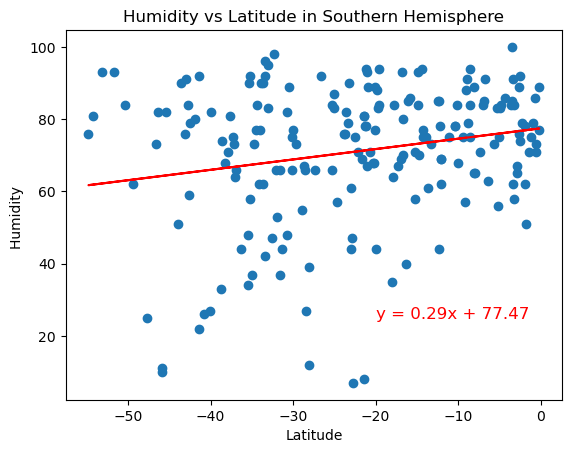

In [72]:
# Southern Hemisphere


x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 
                        'Humidity vs Latitude in Southern Hemisphere',
                        'Latitude', 'Humidity ',
                       (-20,20))

**Discussion about the linear relationship:** The correlation between humidity and latitude in the Southern Hemisphere is positive, however extremely week as the points are  more scattered. The prediction of humidity increaseing by .29 units for every one increase in latitude can not be relied upon becuse of the weak correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.058990706453697146


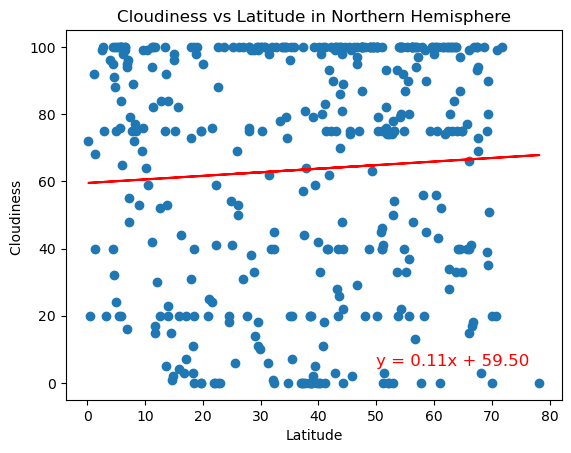

In [83]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 
                        'Cloudiness vs Latitude in Northern Hemisphere',
                        'Latitude', 'Cloudiness ',
                       (50,0))

**Discussion about the linear relationship:**The correlation between cloudiness and latitude is showing as positive, however extremely weak as the plot line is almost horizontal and the points are highly scattered.

The r-value is: 0.2130395963370268


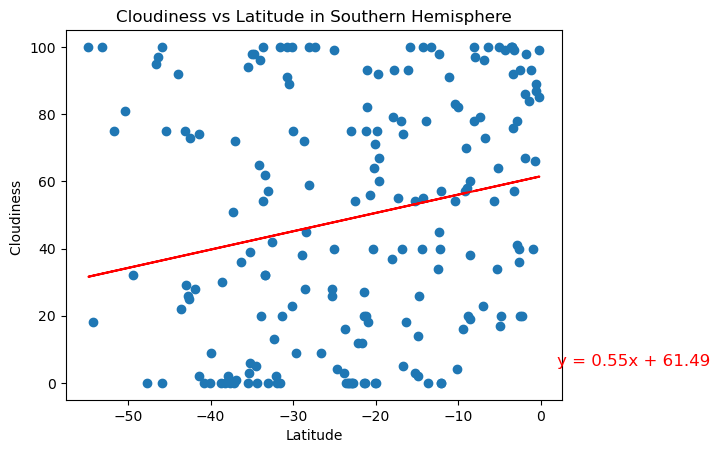

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, 
                        'Cloudiness vs Latitude in Southern Hemisphere',
                        'Latitude', 'Cloudiness ',
                       (2,0))

**Discussion about the linear relationship:** The correlation between cloudiness and latitude in the Southern Hemisphere is showing positive with a per unit increase in the cloudiness of .55, although this points to a more substantial level of increase the data can't be relied upon with a weaker level of correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1118519844007339


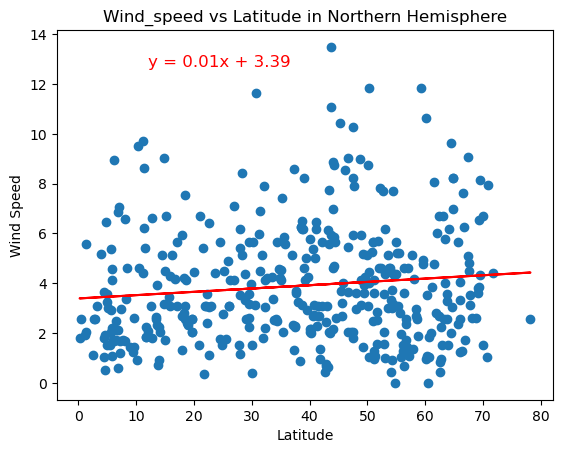

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 
                        'Wind_speed vs Latitude in Northern Hemisphere',
                        'Latitude', 'Wind Speed',
                       (12,12))

**Discussion about the linear relationship:** The data suggests a mild positive correlation between wind speed and latitude in the Northern Hemisphere. There is minimal movement of wind speed at .01 units and the r-value is low which points to a weak correlation.

The r-value is: -0.21276916544441316


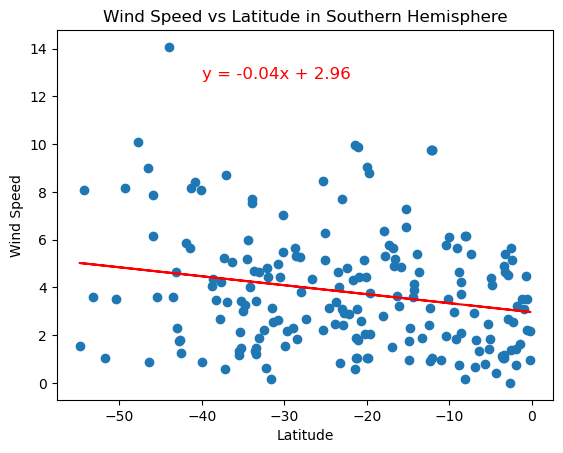

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, 
                        'Wind Speed vs Latitude in Southern Hemisphere',
                        'Latitude', 'Wind Speed',
                       (-40,12))

**Discussion about the linear relationship:** The data suggests a mild negative correlation between wind speed and latitude in the Southern Hemisphere. There is minimal movement of wind speed at -.04 units and the r-value is low which points to a weak correlation.